# Water Pumps: Random Forest

We will start with a very basic data scan and cleaning and jump right away to the prediction model which will give us a starting point of minimal data prediction power and feature structure

We will start with Random forest classifier. 

In [288]:
import pandas as pd
import numpy as np

% matplotlib inline

UsageError: Line magic function `%` not found.


In [289]:
path_train_x = '/Users/toma/Documents/Projects/taarifa-water-pumps/data/train_x.csv'
path_train_y = '/Users/toma/Documents/Projects/taarifa-water-pumps/data/train_y.csv'

In [290]:
train_x = pd.read_csv(path_train_x)

In [291]:
train_y = pd.read_csv(path_train_y)

In [292]:
print(train_x.shape)
print(train_y.shape)

(59400, 40)
(59400, 2)


In [293]:
train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [294]:
train_x.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

Create a variable to keep track of required replacements

In [295]:
repl = {}

### Target Variable

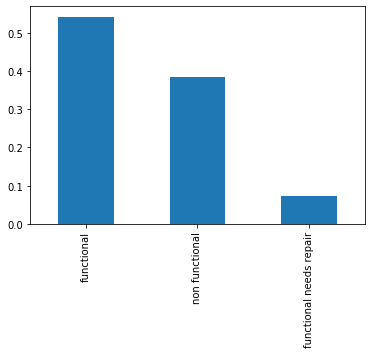

In [296]:
train_y.status_group.value_counts(dropna=False, normalize=True).plot(kind='bar')

### Time Variables

We have 2 datetime variables: date recorded and construction year

In [297]:
train_x.date_recorded = pd.to_datetime(train_x.date_recorded, format="%Y-%m-%d")

In [298]:
train_x.date_recorded.dt.year.value_counts(dropna=False)

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

In [299]:
train_x.construction_year.describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

Set 0 values  in `construction_year` as missing

In [300]:
repl['construction_year'] = {0: np.nan}

In [301]:
train_x.construction_year = train_x.construction_year.replace({0: np.nan})

In [302]:
train_x.construction_year.describe()

count    38691.000000
mean      1996.814686
std         12.472045
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

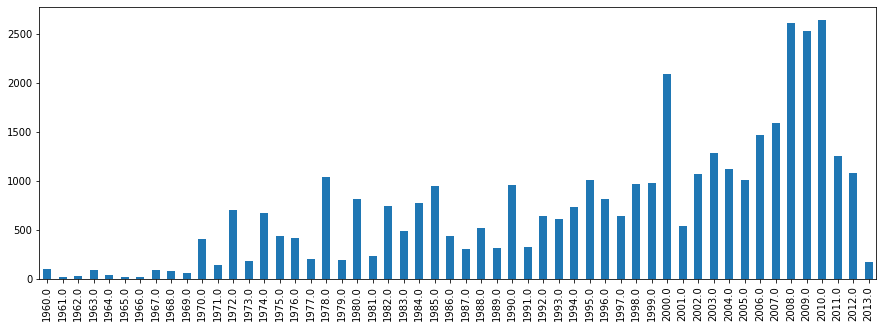

In [303]:
train_x.construction_year.value_counts().sort_index().plot(kind='bar', figsize=(15,5))

In [304]:
train_x.construction_year.isnull().mean()

0.34863636363636363

~ 34% of data for the year of construction is missing

## Categorical variables

In [305]:
train_x.columns[train_x.dtypes == object]

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [306]:
for c in train_x.columns[train_x.dtypes == object]:
    print("---" + c)
    print(train_x[c].value_counts(dropna=False, normalize=True) )
    print("-"*60)

---funder
Government Of Tanzania     0.152929
NaN                        0.061195
Danida                     0.052424
Hesawa                     0.037071
Rwssp                      0.023131
World Bank                 0.022710
Kkkt                       0.021667
World Vision               0.020976
Unicef                     0.017795
Tasaf                      0.014764
District Council           0.014192
Dhv                        0.013956
Private Individual         0.013906
Dwsp                       0.013653
0                          0.013081
Norad                      0.012879
Germany Republi            0.010269
Tcrs                       0.010135
Ministry Of Water          0.009933
Water                      0.009815
Dwe                        0.008148
Netherlands                0.007912
Hifab                      0.007576
Adb                        0.007542
Lga                        0.007441
Amref                      0.007155
Fini Water                 0.006616
Oxfam             

never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: payment, dtype: float64
------------------------------------------------------------
---payment_type
never pay     0.426734
per bucket    0.151263
monthly       0.139731
unknown       0.137323
on failure    0.065892
annually      0.061313
other         0.017744
Name: payment_type, dtype: float64
------------------------------------------------------------
---water_quality
soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64
------------------------------------------------------------
---quality_group
good        0.85552

### Overview of categorical features

In [307]:
exclude = []

In [308]:
train_x.columns[train_x.dtypes == object]

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [309]:
cat_features = train_x.columns[train_x.dtypes == object]
cat_desc = train_x[cat_features].describe(include='all').transpose()[['count', 'unique', 'top']]
cat_desc["perc missing"] = (1 - cat_desc["count"]/train_x.shape[0]) * 100
cat_desc.sort_values('unique', ascending=False)

,count,unique,top,perc missing
wpt_name,59400,37400,none,0
subvillage,59029,19287,Madukani,0.624579
scheme_name,31234,2696,K,47.4175
installer,55745,2145,DWE,6.1532
ward,59400,2092,Igosi,0
funder,55765,1897,Government Of Tanzania,6.11953
lga,59400,125,Njombe,0
region,59400,21,Iringa,0
extraction_type,59400,18,gravity,0
extraction_type_group,59400,13,gravity,0


For now we will exclude columns with too many categories > 1000

In [310]:
exclude.extend(cat_desc.query('unique>1000').index)

In [311]:
exclude

['funder', 'installer', 'wpt_name', 'subvillage', 'ward', 'scheme_name']

In [312]:
repl['scheme_management'] = {'None': np.nan}

## Continious Variables

In [313]:
train_x.iloc[:,1:].describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,38691.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1996.814686
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,12.472045
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1987.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,2000.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2008.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Change zero population to nan

In [314]:
repl['population'] = {0: np.nan}

In [315]:
repl

{'construction_year': {0: nan},
 'scheme_management': {'None': nan},
 'population': {0: nan}}

In [316]:
exclude.append('id')


In [383]:
def read_preprocess(x_path, y_path, repl):
    df_x = pd.read_csv(x_path)
    df_y = pd.read_csv(y_path)
    df = pd.merge(df_x, df_y, left_on='id', right_on='id', how='left')
    df = df.replace(repl)
    
    df.date_recorded = pd.to_datetime(train_x.date_recorded, format="%Y-%m-%d")
    df['month_recorded'] = df.date_recorded.dt.month
    df['year_recorded'] = df.date_recorded.dt.year
    df['age_recorded'] = df.date_recorded.dt.year - df.construction_year
    df.loc[df.age_recorded < 0, 'age_recorded'] = np.nan
    df.permit = df.permit.replace({True: 'yes', False: 'no'})    
    df.public_meeting = df.public_meeting.replace({True: 'yes', False: 'no'})    
    
    
    return df
    

In [318]:
data = read_preprocess(path_train_x, path_train_y, repl )

In [319]:
data.sample(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,month_recorded,year_recorded,age_recorded
32805,10461,0.0,2013-01-23,Dwsp,0,DWE,0.000000,-2.000000e-08,Tuokoe,0,...,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,2013,NaN
37960,72538,600.0,2013-01-27,Isf,789,DWE,29.734142,-4.878966e+00,Utulivu,0,...,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,non functional,1,2013,4.0
37622,38021,5.0,2013-12-03,Germany Republi,1027,CES,37.148685,-3.280562e+00,Kwa Rashid Kimaro,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,12,2013,14.0


## Missing values

In [354]:
data = data.drop(exclude, axis=1)

In [355]:
col = [c for c in data.columns if c not in exclude]
d = data[col].isnull().sum() / data.shape[0]
d[d>0]

population           0.359949
public_meeting       0.056128
scheme_management    0.065286
permit               0.051448
age_recorded         0.348788
dtype: float64

Categorical variables

In [322]:
data.columns[(d>0) & (data.dtypes==object)]

Index(['public_meeting', 'scheme_management', 'permit'], dtype='object')

Numeric variables

In [323]:
data.columns[(d>0) & (data.dtypes!=object)]

Index(['population', 'construction_year', 'age_recorded'], dtype='object')

In [324]:
data.age_recorded.describe()

count    38682.000000
mean        15.360245
std         12.490610
min          0.000000
25%          5.000000
50%         13.000000
75%         25.000000
max         53.000000
Name: age_recorded, dtype: float64

## Random Forest

In [384]:
data = read_preprocess(path_train_x, path_train_y, repl )

In [411]:
exclude = ['funder',
 'installer',
 'wpt_name',
 'subvillage',
 'ward',
 'scheme_name',
 'id',
 'construction_year',
 'date_recorded']

In [386]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report

In [387]:
X = data.drop(['status_group'] + exclude, axis=1)
y = data.status_group 

In [388]:
numeric_features = X.select_dtypes(include=np.number).columns
print(numeric_features)

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'month_recorded',
       'year_recorded', 'age_recorded'],
      dtype='object')


In [389]:
categorical_features = X.select_dtypes(exclude=np.number).columns
print(categorical_features)

Index(['basin', 'region', 'lga', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')


In [378]:
numeric_transformer =  SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [394]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [395]:
print('train dataset', X_train.shape)
print('dev dataset', X_dev.shape)

train dataset (47520, 34)
dev dataset (11880, 34)


In [396]:
X_train = preprocessor.fit_transform(X_train) 

In [398]:
X_dev = preprocessor.transform(X_dev) 

In [399]:
print('train dataset', X_train.shape)
print('dev dataset', X_dev.shape)

train dataset (47520, 311)
dev dataset (11880, 311)


In [402]:
clf = RandomForestClassifier(n_estimators=120, max_depth=12, class_weight='balanced')

In [403]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=120, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [404]:
y_train_pred = clf.predict(X_train)

In [416]:
y_dev_pred = clf.predict(X_dev)
y_dev_pred_proba = clf.predict_proba(X_dev)

In [469]:
print("Train set Performance")
print("accuracy", accuracy_score(y_train, y_train_pred) )
print("f1", f1_score(y_train, y_train_pred,  average='macro') )
print("\nDev set peformance")
print("accuracy", accuracy_score(y_dev, y_dev_pred) )
print("f1", f1_score(y_dev, y_dev_pred,  average='macro') )

Train set Performance
accuracy 0.7384680134680135
f1 0.6656627013467987

Dev set peformance
accuracy 0.7026094276094276
f1 0.6233123293373569


In [218]:
print(classification_report(y_train, y_train_pred))

                         precision    recall  f1-score   support

             functional       0.73      0.97      0.83     25802
functional needs repair       0.80      0.12      0.20      3466
         non functional       0.92      0.63      0.75     18252

               accuracy                           0.78     47520
              macro avg       0.81      0.57      0.59     47520
           weighted avg       0.81      0.78      0.75     47520



In [219]:
print(classification_report(y_dev, y_dev_pred))



                         precision    recall  f1-score   support

             functional       0.72      0.96      0.82      6457
functional needs repair       0.69      0.10      0.17       851
         non functional       0.89      0.61      0.73      4572

               accuracy                           0.76     11880
              macro avg       0.77      0.56      0.57     11880
           weighted avg       0.78      0.76      0.74     11880



### ROC and AUC

In [458]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp
%matplotlib inline

In [423]:
clf.classes_

array(['functional', 'functional needs repair', 'non functional'],
      dtype=object)

In [431]:
n_classes = len(clf.classes_)

In [432]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_name in enumerate(clf.classes_):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_dev, y_dev_pred_proba[:, i], pos_label=class_name)
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])


In [459]:
# Compute micro-average ROC curve and ROC area
y_dev_bn = label_binarize(y_dev, classes=clf.classes_)
fpr["micro"], tpr["micro"], _ = roc_curve(y_dev_bn.ravel(), y_dev_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[cls] for cls in clf.classes_]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for cls in clf.classes_:
    mean_tpr += interp(all_fpr, fpr[cls], tpr[cls])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


In [460]:
roc_auc

{'functional': 0.8562944708824409,
 'functional needs repair': 0.8513152324941009,
 'non functional': 0.8817177157213585,
 'micro': 0.8761289540324684,
 'macro': 0.8631512167617686}

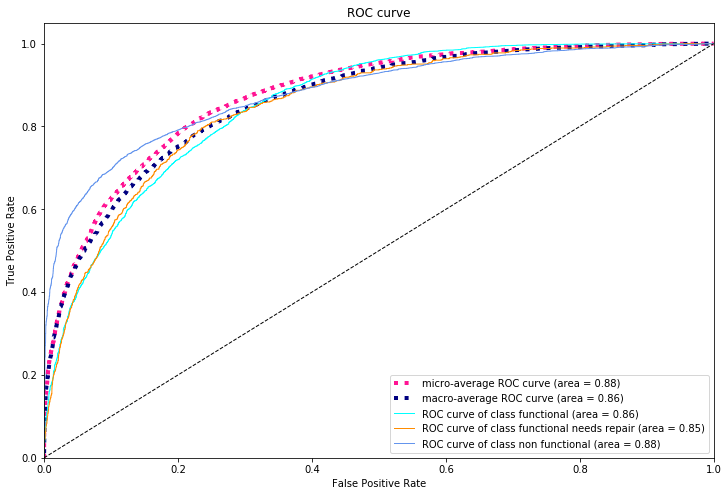

In [461]:
# Plot all ROC curves
fig, ax = plt.subplots(figsize=(12,8))
lw=1
ax.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for cls, color in zip(clf.classes_, colors):
    ax.plot(fpr[cls], tpr[cls], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(cls, roc_auc[cls]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance